In [1]:
import nltk 
import pandas as pd
import numpy as np

In [2]:
hotstar=pd.read_csv('https://github.com/skathirmani/datasets/raw/master/hotstar.allreviews_Sentiments.csv')
print(hotstar.shape)
hotstar.head()

(5053, 13)


,ID,UserName,Created_Date,Reviews,Lower_Case_Reviews,Sentiment_Manual_BP,Sentiment_Manual,Review_Length,DataSource,Year,Month,Date,Sentiment_Polarity
0,1,NaN,8/10/2017,Hh,hh,Negative,Negative,2,Google_PlayStore,2017,8,10,Neutral
1,2,NaN,8/11/2017,No,no,Negative,Negative,2,Google_PlayStore,2017,8,11,Neutral
2,3,asadynwa,8/12/2017,@hotstar_helps during paymnt for premium subsc...,@hotstar_helps during paymnt for premium subsc...,Help,Negative,140,Twitter,2017,8,12,Negative
3,4,jineshroxx,8/11/2017,@hotstartweets I am currently on Jio network a...,@hotstartweets i am currently on jio network a...,Help,Negative,140,Twitter,2017,8,11,Positive
4,5,YaminiSachar,8/5/2017,@hotstartweets the episodes of Sarabhai vs Sar...,@hotstartweets the episodes of sarabhai vs sar...,Help,Negative,140,Twitter,2017,8,5,Neutral


In [3]:
hotstar.isnull().sum()

ID                       0
UserName               722
Created_Date             0
Reviews                  0
Lower_Case_Reviews       0
Sentiment_Manual_BP      0
Sentiment_Manual         0
Review_Length            0
DataSource               0
Year                     0
Month                    0
Date                     0
Sentiment_Polarity       0
dtype: int64

In [4]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Uday\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti=SentimentIntensityAnalyzer()

C:\Users\Uday\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [6]:
senti.polarity_scores('i love india')
senti.polarity_scores('i LOVE india :)')

{'neg': 0.0, 'neu': 0.112, 'pos': 0.888, 'compound': 0.8374}

In [7]:
import matplotlib.pyplot as plt
def get_sentiment_score(review):
    compound_score=senti.polarity_scores(review)['compound']
    return compound_score

def get_sentiment(score):
    if score>0.25:
        return 'Positive'
    if score<-0.25:
        return 'Negative'
    else:
        return 'Nuetral'

hotstar['sentiment_score']=hotstar['Reviews'].apply(get_sentiment_score)
hotstar['sentiment_vader']=hotstar['sentiment_score'].apply(get_sentiment)
hotstar['sentiment_vader'].value_counts().plot.barh(color='steelblue')

In [8]:
hotstar['date']=pd.to_datetime(hotstar['Created_Date'])
hotstar['date'].min(),hotstar['date'].max()

(Timestamp('2017-08-04 00:00:00'), Timestamp('2017-08-13 00:00:00'))

In [9]:
sent_trend=hotstar.groupby(['date','sentiment_vader']).size()
sent_trend=sent_trend.reset_index()
sent_trend=sent_trend.rename(columns={0:'count'})
sent_trend

,date,sentiment_vader,count
0,2017-08-04,Negative,85
1,2017-08-04,Nuetral,130
2,2017-08-04,Positive,112
3,2017-08-05,Negative,111
4,2017-08-05,Nuetral,177
5,2017-08-05,Positive,108
6,2017-08-06,Negative,50
7,2017-08-06,Nuetral,144
8,2017-08-06,Positive,93
9,2017-08-07,Negative,72


Text(0.5,1,'Sentiment Analysis on Hotstar reviews')

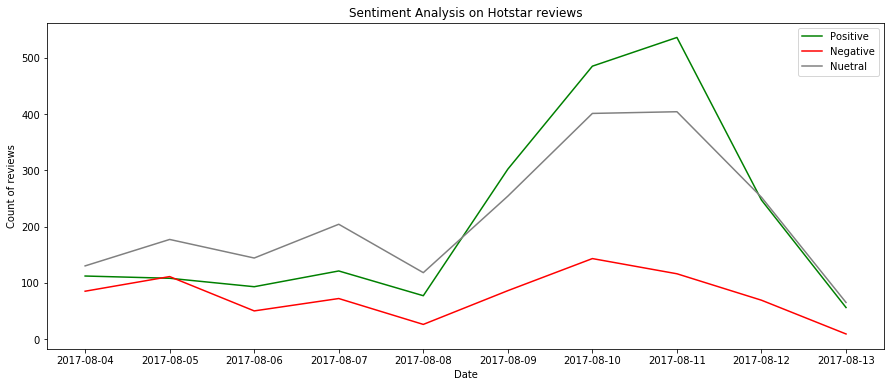

In [10]:
positive_rows=sent_trend[sent_trend['sentiment_vader']=='Positive']
negative_rows=sent_trend[sent_trend['sentiment_vader']=='Negative']
neu_rows=sent_trend[sent_trend['sentiment_vader']=='Nuetral']
plt.figure(figsize=(15,6))
plt.plot(positive_rows['date'],positive_rows['count'],color='green')
plt.plot(negative_rows['date'],negative_rows['count'],color='red')
plt.plot(neu_rows['date'],neu_rows['count'],color='gray')
plt.legend(['Positive','Negative','Nuetral'])
plt.xlabel('Date')
plt.ylabel('Count of reviews')
plt.title('Sentiment Analysis on Hotstar reviews')

## Supervised sentiment analysis

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import nltk

stop_words=nltk.corpus.stopwords.words('english')
stop_words=list(np.setdiff1d(stop_words,['not']))
junk_words=[]
stop_words.extend(junk_words)
stemmer=nltk.PorterStemmer()
docs=hotstar['Reviews'].fillna('').str.lower().str.replace('[^a-z ]','')
docs_clean=docs.apply(lambda v:' '.join([stemmer.stem(word) for word in v.split(' ') if word not in stop_words]))

train,test=train_test_split(docs_clean,test_size=0.5,random_state=100)

cv=CountVectorizer()
cv.fit(train)
train_x=cv.transform(train)
test_x=cv.transform(test)

train_y=hotstar.loc[train.index]['Sentiment_Manual']
test_y=hotstar.loc[test.index]['Sentiment_Manual']

adaboost_model=RandomForestClassifier(n_estimators=300,random_state=100)
adaboost_model.fit(train_x,train_y)
pred_class=adaboost_model.predict(test_x)
accuracy_score(test_y,pred_class)

0.7514839730906213

## Web Scraping

In [12]:
url='https://bit.ly/2QjOT2Z'

In [13]:
import os
os.getcwd()

'C:\\Users\\Uday\\Downloads\\Text mining'

In [14]:
#!pip install selenium

mysql-connector-python 8.0.13 requires protobuf>=3.0.0, which is not installed.
distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [39]:
from selenium import webdriver
browser=webdriver.Chrome('chromedriver.exe')

In [16]:
url='https://bit.ly/2QjOT2Z'
browser.get(url)

In [17]:
parent_tags=browser.find_elements_by_css_selector('li.job-listing')
len(parent_tags)

25

In [18]:
import bs4

In [25]:
jobs=pd.DataFrame()

In [26]:
for job in parent_tags:
    title_tag=job.find_element_by_css_selector('span.job-title-text')
    title=title_tag.get_attribute('innerHTML').replace('<b>','').replace('</b>','')
    
    company_tag=job.find_element_by_css_selector('span.company-name-text')
    company=company_tag.get_attribute('innerHTML')
    
    location_tag=job.find_element_by_css_selector('span.job-location')
    location_tag=location_tag.find_element_by_css_selector('span')
    location=location_tag.get_attribute('innerHTML')
    
    
    description_tag=job.find_element_by_css_selector('div.job-description')
    description=description_tag.get_attribute('innerHTML')
    #rep_str='..<span class="job-attribution"> </span>'
    description=bs4.BeautifulSoup(description,'html.parser').text
    #description=description.replace(rep_str,'')
    
    #print(description)
    #print('------------')   
    curr_job={'title':title,
         'company':company,
         'location':location,
         'description':description}
    jobs=jobs.append(curr_job,ignore_index=True)

In [27]:
jobs.head()

,company,description,location,title
0,Absolutdata Analytics,Technology and Data related Experience we are ...,"Gurgaon, IN",DATA SCIENCE MANAGER
1,"Bloom Consulting Services, Inc.","Understand, develop and take ownership of soph...","Bangalore, IN",Analyst (Data Science)
2,Finisar Corporation (NASDAQ: FNSR),An ideal candidate in this position must be an...,"Hyderabad, IN",Data Science Lead
3,Viacom18 Media Private Limited,Viacom18 is India’s fastest growing entertainm...,"Mumbai, IN","Manager, Data Science"
4,Nielsen Media Research,Primary Responsibilities Design and implement ...,"Vadodara, IN","Executive, Data Science"


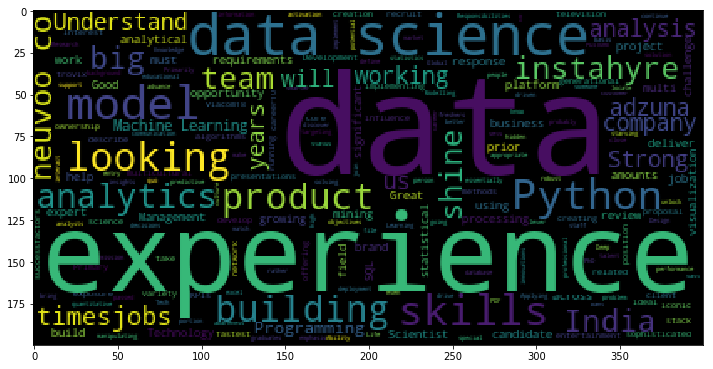

In [29]:
 from wordcloud import WordCloud
wc=WordCloud().generate(' '.join(jobs['description']))
plt.figure(figsize=(12,12))
plt.imshow(wc)

## Text Summarization

In [30]:
!pip install sumy

  Running setup.py bdist_wheel for docopt: started
  Running setup.py bdist_wheel for docopt: finished with status 'done'
  Stored in directory: C:\Users\Uday\AppData\Local\pip\Cache\wheels\9b\04\dd\7daf4150b6d9b12949298737de9431a324d4b797ffd63f526e
  Running setup.py bdist_wheel for breadability: started
  Running setup.py bdist_wheel for breadability: finished with status 'done'
  Stored in directory: C:\Users\Uday\AppData\Local\pip\Cache\wheels\5a\4d\a1\510b12c5e65e0b2b3ce539b2af66da0fc57571e528924f4a52
Successfully built docopt breadability


mysql-connector-python 8.0.13 requires protobuf>=3.0.0, which is not installed.
distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [31]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer

In [40]:
url='https://www.livemint.com/Companies/b4LtGm53W966uRNUiVQQKL/Maggi-case-Supreme-Court-revives-classaction-suit-against.html'
browser.get(url)

In [42]:
div_tag=browser.find_element_by_css_selector('div.content')
para_tags=div_tag.find_elements_by_css_selector('p')
len(para_tags)

12

In [43]:
sentences=''
for para in para_tags:
    para_text=para.get_attribute('innerHTML')
    sentences=sentences+' '+para_text
    sentences=bs4.BeautifulSoup(sentences,'html.parser').text

In [44]:
sentences[:20]

' New Delhi: In a set'

In [45]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Uday\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [46]:
parser=PlaintextParser(sentences,Tokenizer('english'))

summarizer=LexRankSummarizer()
summarized_sentences=summarizer(parser.document,3)

for sentence in summarized_sentences:
    print(sentence)
    print('-----------')


New Delhi: In a setback to Nestle India Ltd, the Supreme Court on Thursday lifted a stay on the proceedings of a class-action suit filed by the central government against the maker of Maggi noodles in the apex consumer court.
-----------
The National Consumer Disputes Redressal Commission (NCDRC) can now continue proceedings against Nestle India, based on  the results of tests of Maggi noodle samples conducted by the Central Food Technological Research Institute (CFTRI) in Mysuru.
-----------
Nestle said that Maggi, which once enjoyed a 75% share of the market before the ban, clawed back to 60% in 2016.
-----------
